# Markov Chain Simulation of MM1
Simulate an M/M/1 queue using a Markov-chain simulation to evaluate the mean queue-size for the cases of Section 4.2 in classnotes.pdf. Compare the results with the results obtain analytically and with those obtained using the **G/G/1 simulation principles**. In your comparison consider accuracy (closeness to the analytical results) the length of the confidence intervals and running times.

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

## Markov Chain Simulation
For Markov Chain simulation, the pseudocode and its comments have been provided on Slides Page 330.

There is a tip when implementing it in Python. If you strictly follow the steps on P330, please realize that the loop function should be **WHILE-LOOP**. If you use a **FOR-LOOP** (`for i in range(MAXN)`) instead, the index will increase by 2 in every loop.

For G/G/1 simulation, please refer to *M/M/1.ipynb*.

In [2]:
def markov_chain_mm1(lam, mu, MAXN):
    EQ = 0 # estimation of mean queue size
    Q = 0 # queue size
    N = 0 # number of arrivals so far
    
    start = time.time()
    while N < MAXN:
        if random.random() <= lam / (lam + int(Q > 0) * mu):
            N += 1
            EQ = ((N - 1) * EQ + Q) / N
            Q += 1
        else:
            Q -= 1
    end = time.time()

    return EQ, end - start

## G/G/1 Simulation

In [3]:
def general_simulation_mm1(lam, mu, total_arrivals):
    arrival_time = np.zeros(total_arrivals) # the time when the customer arrives 
    service_time = np.zeros(total_arrivals) # the service time
    enter_time = np.zeros(total_arrivals)   # the time when the customer is served
    departure_time = np.zeros(total_arrivals)  # the time when the customer leaves the queue
    
    start = time.time()
    # initialization of service time and arrival time
    for i in range(total_arrivals):
        service_time[i] = random.expovariate(mu)
    for i in range(1, total_arrivals):
        arrival_time[i] = arrival_time[i - 1] + random.expovariate(lam)

    departure_time[0] = service_time[0]

    # simulation process
    for i in range(1, total_arrivals):
        if departure_time[i - 1] < arrival_time[i]:
            enter_time[i] = arrival_time[i]
        else:
            enter_time[i] = departure_time[i - 1]
        departure_time[i] = enter_time[i] + service_time[i]

    delay = departure_time - arrival_time
    mean_queue_size = np.sum(delay) / departure_time[total_arrivals - 1]
    end = time.time()
    return mean_queue_size, end - start

## Performance Comparison
This section compares the performance of the two methods, including the mean queue size, the accuracy, the confidence intervals, and the running times.

I set the arrival rate $\lambda=3$, the service rate $\mu=4$, and the number of arrivals $N=100,000$. Then run the code 100 times to get the confidence intervals.

In [4]:
loop_num = 100
lam = 3
mu = 4
length = 100000

mk_mean_queue_size = np.zeros(loop_num)
mk_running_times = np.zeros(loop_num)
for i in range(loop_num):
    mean_queue_size, delay = markov_chain_mm1(lam, mu, length)
    mk_mean_queue_size[i] = mean_queue_size
    mk_running_times[i] = delay
    
g_mean_queue_size = np.zeros(loop_num)
g_running_times = np.zeros(loop_num)
for i in range(loop_num):
    queue, delay = general_simulation_mm1(lam, mu, length)
    g_mean_queue_size[i] = queue
    g_running_times[i] = delay

mk_confidence_interval = stats.norm.interval(alpha = 0.95, 
                                             loc = np.mean(mk_mean_queue_size), 
                                             scale = stats.sem(mk_mean_queue_size))
g_confidence_interval = stats.norm.interval(alpha = 0.95, 
                                            loc = np.mean(g_mean_queue_size), 
                                            scale = stats.sem(g_mean_queue_size))

Mean Queue Size (Markov Chain): 2.995287699999999
Mean Queue Size (G/G/1): 2.9883242439274285
Confidence Interval (Markov Chain): (2.9813703613767943, 3.009205038623204)
Interval Length (Markov Chain): 0.027834677246409534
Confidence Interval (G/G/1): (2.9763568265324625, 3.0002916613223944)
Interval Length (G/G/1): 0.02393483478993197


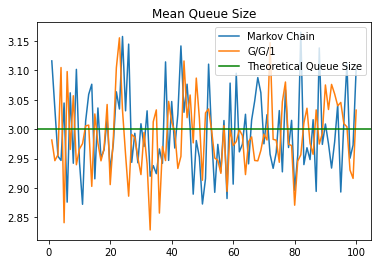

In [5]:
theoretical_mean_queue_size = (lam / mu) / (1 - lam / mu)
plt.title("Mean Queue Size")
plt.plot(np.linspace(1, 100, 100), mk_mean_queue_size, label = "Markov Chain")
plt.plot(np.linspace(1, 100, 100), g_mean_queue_size, label = "G/G/1")
plt.axhline(y = theoretical_mean_queue_size, color = 'g', label = "Theoretical Queue Size")
plt.legend()
print("Mean Queue Size (Markov Chain):", np.mean(mk_mean_queue_size))
print("Mean Queue Size (G/G/1):", np.mean(g_mean_queue_size))
print("Confidence Interval (Markov Chain):", mk_confidence_interval)
print("Interval Length (Markov Chain):", mk_confidence_interval[1] - mk_confidence_interval[0])
print("Confidence Interval (G/G/1):", g_confidence_interval)
print("Interval Length (G/G/1):", g_confidence_interval[1] - g_confidence_interval[0])

Mean Running Time (Markov Chain): 0.0361320948600769
Mean Running Time (G/G/1): 0.08337589740753173


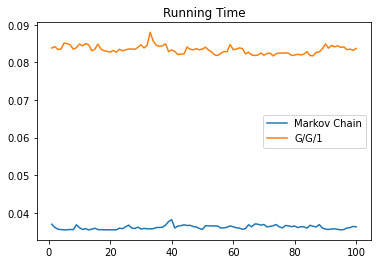

In [6]:
plt.title("Running Time")
plt.plot(np.linspace(1, 100, 100), mk_running_times, label = "Markov Chain")
plt.plot(np.linspace(1, 100, 100), g_running_times, label = "G/G/1")
plt.legend()
print("Mean Running Time (Markov Chain):", np.mean(mk_running_times))
print("Mean Running Time (G/G/1):", np.mean(g_running_times))

Given $\lambda=3$ and $\mu=4$, the theoretical mean queue size is 3.

The results show that the mean queue size of the two methods is very close to 3. The confidence intervals all include 3.

In terms of the comparison, Markov Chain's performance is better, because:

1. The mean queue size is closer to 3 than G/G/1's.

2. The mean running time is shorter than G/G/1's.

3. The programming is much easier.

## Acknowledge
Many thanks to Ms. Linjun DAI for pointing out my error in the code.